In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt

In [3]:
model = Sequential()
model.add(Dense(32, input_dim=10, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                352       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [4]:
import numpy as np

In [5]:
np.random.seed(2018)

x_train = np.random.random((6000, 10))
y_train = np.random.randint(2, size=(6000, 1))

x_val = np.random.random((2000, 10))
y_val = np.random.randint(2, size=(2000, 1))

x_test = np.random.random((2000, 10))
y_test = np.random.randint(2, size=(2000, 1))

In [6]:
model = Sequential()
model.add(Dense(64, input_dim=10, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,529
Trainable params: 3,529
Non-traina

In [13]:
history = model.fit(x_train, y_train, batch_size=64, epochs=1000, validation_data=(x_val, y_val), verbose=0)

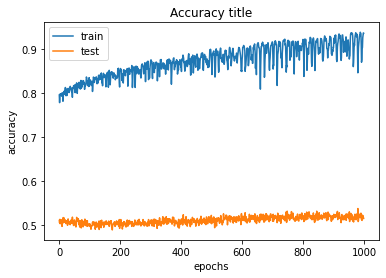

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy title")
plt.legend(["train", "test"], loc='upper left')
plt.show()

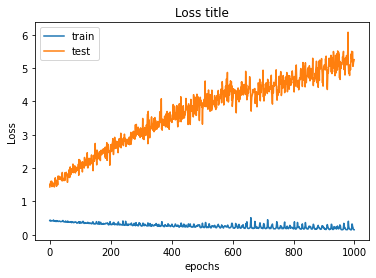

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss title")
plt.legend(["train", "test"], loc='upper left')
plt.show()

In [16]:
model.save("weight/model_bai2.h5")

In [17]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 5.6984 - accuracy: 0.5050


[5.69842529296875, 0.5049999952316284]

In [39]:
pred = model.predict(x_test)

In [48]:
N = 2000
data_pred = pred[0:N].copy()
data_test = y_test[0:N].copy()

In [49]:
data_sample = np.zeros((N, 1))

In [50]:
data_pred[data_pred < 0.5]=0
data_pred[data_pred >= 0.5]=1
data_sample[data_pred == data_test] = 2

In [51]:
x = data_sample[data_sample==2].shape

print("{} - {} %".format(x[0], x[0]/N))

1010 - 0.505 %


## Result for self-valutate and model-valuate is simularly.